# Analyzing Linear Regression Results for Distance Analysis
### Laurence Nickel (i6257119)

Libraries used: 
* pandas (version: '1.2.4')
* re (version: '2.2.1')
* sys (version: '3.8.8')
* os (version: '3.8.8')
* plotly.express (version: '5.13.1')
* seaborn (version: '0.11.1')
* matplotlib.pyplot (version: '3.3.4')

## Introduction

Within this notebook, the results of the linear regression algorithms performed in the notebook 'Linear Regression for Distance Analysis' to predict the expression levels for the genes considering the methylation values for the CpG sites where different distances are experimented with the goal of finding which of the distances is the best to use are analyzed. Since the number of distances experimented with was pretty high (40 distances), the results were split into multiple DataFrames which will be all loaded into this notebook. As a reminder, the distances presented in the overview below were experimented below:
* 5,000
* 10,000
* 15,000
* 25,000
* 50,000
* 75,000
* 100,000
* 150,000
* 250,000
* 350,000
* 500,000
* 750,000
* 1,000,000
* 1,500,000
* 2,000,000
* 2,500,000
* 4,000,000
* 5,000,000
* 6,000,000
* 7,500,000
* 10,000,000
* 12,500,000
* 15,000,000
* 17,500,000
* 20,000,000
* 25,000,000
* 30,000,000
* 40,000,000
* 50,000,000
* 65,000,000
* 80,000,000
* 100,000,000
* 120,000,000
* 150,000,000
* 200,000,000
* 250,000,000
* 350,000,000
* 500,000,000
* 750,000,000
* 1,000,000,000

For each of these distances linear regression models were built, one for each gene, and these were evaluated by computing the R<super>2</super> value. This was performed for all genes present within the log2-transformed gene expression data for which the M-transformed methylation data was used to retrieve the methylation values for each of the CpG sites for each sample.

The kinds of analysis performed is displayed below:
* Plotting the distributions of R<super>2</super> scores for each of the distances. This is done through performing a general exploratory data analysis as well as plotting a box and whisker plot for each of the distances.


Eventually, the distance of the best performing experiment will represent which distance we should use to determine which CpG sites to consider (based on their position relative to a particular gene) for predicting the gene expression value of a particular gene.

### Importing libraries

Before we can start to define all the functions, we should first import some libraries that will be used throughout this notebook.

In [1]:
print("Starting the importing of the libraries...")


import pandas as pd
import re
import sys
import os

# Here we first need to install the plotly library.
!pip install plotly
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


print("Finishing the installing of the libraries.")

Starting the importing of the libraries...
Finishing the installing of the libraries.


Now that all the libraries have been imported, we can verify that these libraries have been loaded into this notebook by calling the version property of the library.

In [2]:
# Retrieving the version of the libraries to verify they have been correctly loaded into this notebook.
print("The library 'pd' (pandas) has been loaded into the notebook with its version being:")
print(pd.__version__)

print("\nThe library 're' has been loaded into the notebook with its version being:")
print(re.__version__)

print("\nThe library 'sys' has been loaded into the notebook with its version being:")
print(sys.version)

print("\nThe library 'plotly' has been loaded into the notebook with its version being:")
print(plotly.__version__)

print("\nThe library 'sns' (seaborn) has been loaded into the notebook with its version being:")
print(sns.__version__)

print("\nThe library 'matplotlib' has been loaded into the notebook with its version being:")
print(matplotlib.__version__)

The library 'pd' (pandas) has been loaded into the notebook with its version being:
1.2.4

The library 're' has been loaded into the notebook with its version being:
2.2.1

The library 'sys' has been loaded into the notebook with its version being:
3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]

The library 'plotly' has been loaded into the notebook with its version being:
5.13.1

The library 'sns' (seaborn) has been loaded into the notebook with its version being:
0.11.1

The library 'matplotlib' has been loaded into the notebook with its version being:
3.3.4


### Defining the data directories

In addition, we also need to define our data directories from which the gene expression and methylation data files and the training and test splits data files will be loaded. Please mind that these need to be changed to the desired directories to be able to work with the data directories.

In [3]:
data_directory_location_files = "C:/Users/laure/OneDrive/Documenten/Bachelor Thesis Data/location_data"
data_directory_results_distance = "C:/Users/laure/OneDrive/Documenten/Bachelor Thesis Data/results/Distance Analysis/Linear Regression"

## Loading the Chromosomes Length File

### Loading the 'chromosomes_length_data.csv' file

Loading the 'chromosomes_length_data.csv' file into this notebook by calling the function 'pd.read_csv()' with as a parameter the to be read file.

In [4]:
# Loading the file 'chromosomes_length_data.csv'.
chromosomes_length_data = pd.read_csv(data_directory_location_files + '/chromosomes_length_data.csv')

print("The 'chromosomes_length_data' DataFrame containing the location data of the genes:")
chromosomes_length_data

The 'chromosomes_length_data' DataFrame containing the location data of the genes:


,chromosome,length
0,chr1,249250621
1,chr2,243199373
2,chr3,198022430
3,chr4,191154276
4,chr5,180915260
5,chr6,171115067
6,chr7,159138663
7,chr8,146364022
8,chr9,141213431
9,chr10,135534747


## Loading the R2 scores files

Within this section, the files containing the R<super>2</super> scores for multiple distances are loaded into this notebook:
* R2_5000_to_50000_df.csv
* R2_75000_to_350000_df.csv
* R2_500000_to_2000000_df.csv
* R2_2500000_to_7500000_df.csv
* R2_10000000_to_20000000_df.csv
* R2_25000000_to_65000000_df.csv
* R2_80000000_to_200000000_df.csv
* R2_250000000_to_1000000000_df.csv

These are present in the directory 'data_directory_results_distance'. For each of the corresponding files, this can be achieved by calling the function 'pd.read_csv()' with as a parameter the to be read file.

#### Loading the 'R2_5000_to_50000_df.csv' file into this notebook

In [5]:
# Loading the 'R2_5000_to_50000_df.csv' file into this notebook by calling the function 'pd.read_csv()'.
R2_5000_to_50000_df = pd.read_csv(data_directory_results_distance + "/" + "R2_5000_to_50000_df.csv")

# Setting the genes to be the index of the DataFrame by calling the function 'set_index()'.
R2_5000_to_50000_df.set_index(R2_5000_to_50000_df.columns[0], inplace=True)

print("The 'R2_5000_to_50000_df' DataFrame containing the data from the 'R2_5000_to_50000_df.csv' file:")
R2_5000_to_50000_df

The 'R2_5000_to_50000_df' DataFrame containing the data from the 'R2_5000_to_50000_df.csv' file:


,"5,000","10,000","15,000","25,000","50,000"
Gene,,,,,
ENSG00000001561,0.058898,0.058898,0.058898,0.058898,-0.269888
ENSG00000001626,0.164565,0.164565,0.164565,0.164565,0.164565
ENSG00000001629,-0.237616,-0.237616,-0.237616,-0.185736,0.039545
ENSG00000001631,0.093532,0.093532,0.093532,0.093532,-0.009443
ENSG00000002587,0.226063,0.226063,0.226063,0.375609,0.238568
...,...,...,...,...,...
ENSG00000287828,-0.383698,-3.027709,-3.939589,-40.056881,-20.736032
ENSG00000287893,0.214680,0.214680,0.214680,0.214680,0.184086
ENSG00000288156,0.430212,0.399344,0.239264,0.239264,-0.355150


#### Loading the 'R2_75000_to_350000_df.csv' file into this notebook

In [6]:
# Loading the 'R2_75000_to_350000_df.csv' file into this notebook by calling the function 'pd.read_csv()'.
R2_75000_to_350000_df = pd.read_csv(data_directory_results_distance + "/" + "R2_75000_to_350000_df.csv")

# Setting the genes to be the index of the DataFrame by calling the function 'set_index()'.
R2_75000_to_350000_df.set_index(R2_75000_to_350000_df.columns[0], inplace=True)

print("The 'R2_75000_to_350000_df' DataFrame containing the data from the 'R2_75000_to_350000_df.csv' file:")
R2_75000_to_350000_df

The 'R2_75000_to_350000_df' DataFrame containing the data from the 'R2_75000_to_350000_df.csv' file:


,"75,000","100,000","150,000","250,000","350,000"
Gene,,,,,
ENSG00000001561,-0.269888,-0.283399,-0.100602,-0.064847,-1.800335
ENSG00000001626,0.164565,0.164565,0.164565,0.039588,0.062186
ENSG00000001629,0.039545,0.003886,0.023261,0.023261,-0.389254
ENSG00000001631,0.241456,0.287940,0.439140,0.434552,0.304702
ENSG00000002587,0.238568,0.238568,0.238568,0.238568,0.238568
...,...,...,...,...,...
ENSG00000287828,-8.982529,-6.614010,-1.793246,-0.791774,-0.406354
ENSG00000287893,0.097730,0.097730,0.040979,0.053461,0.053461
ENSG00000288156,-2.688783,-3.189348,-6.026573,-2.590137,-0.603147


#### Loading the 'R2_500000_to_2000000_df.csv' file into this notebook

In [7]:
# Loading the 'R2_500000_to_2000000_df.csv' file into this notebook by calling the function 'pd.read_csv()'.
R2_500000_to_2000000_df = pd.read_csv(data_directory_results_distance + "/" + "R2_500000_to_2000000_df.csv")

# Setting the genes to be the index of the DataFrame by calling the function 'set_index()'.
R2_500000_to_2000000_df.set_index(R2_500000_to_2000000_df.columns[0], inplace=True)

print("The 'R2_500000_to_2000000_df' DataFrame containing the data from the 'R2_500000_to_2000000_df.csv' file:")
R2_500000_to_2000000_df

The 'R2_500000_to_2000000_df' DataFrame containing the data from the 'R2_500000_to_2000000_df.csv' file:


,"500,000","750,000","1,000,000","1,500,000","2,000,000"
Gene,,,,,
ENSG00000001561,-3.824329,-7.181083,-3.298019,-0.707849,-0.259288
ENSG00000001626,0.044968,-0.062131,-0.062131,-0.399999,-0.399999
ENSG00000001629,-0.443090,-0.565126,-0.883684,-5.170904,-24.446440
ENSG00000001631,0.250391,-0.081997,-1.537503,-3.289242,-1.433497
ENSG00000002587,0.260985,0.245351,-0.243812,-0.106462,-0.892981
...,...,...,...,...,...
ENSG00000287828,-0.466319,-0.457528,-0.153221,0.018351,0.152019
ENSG00000287893,0.155939,0.248260,-0.098469,-1.452326,-2.588495
ENSG00000288156,-0.487809,-0.393693,0.360049,0.367762,0.364155


#### Loading the 'R2_2500000_to_7500000_df.csv' file into this notebook

In [8]:
# Loading the 'R2_2500000_to_7500000_df.csv' file into this notebook by calling the function 'pd.read_csv()'.
R2_2500000_to_7500000_df = pd.read_csv(data_directory_results_distance + "/" + "R2_2500000_to_7500000_df.csv")

# Setting the genes to be the index of the DataFrame by calling the function 'set_index()'.
R2_2500000_to_7500000_df.set_index(R2_2500000_to_7500000_df.columns[0], inplace=True)

print("The 'R2_2500000_to_7500000_df' DataFrame containing the data from the 'R2_2500000_to_7500000_df.csv' file:")
R2_2500000_to_7500000_df

The 'R2_2500000_to_7500000_df' DataFrame containing the data from the 'R2_2500000_to_7500000_df.csv' file:


,"2,500,000","4,000,000","5,000,000","6,000,000","7,500,000"
Gene,,,,,
ENSG00000001561,-0.163398,0.242255,0.264025,0.349907,0.469319
ENSG00000001626,-0.399999,-0.921686,-1.402052,-2.804637,-12.507086
ENSG00000001629,-10.395761,-2.757868,-2.206740,-1.856373,-1.145653
ENSG00000001631,-0.999590,-0.830268,0.195490,0.319192,0.213623
ENSG00000002587,-2.972432,0.230500,0.515962,0.493109,0.474424
...,...,...,...,...,...
ENSG00000287828,0.256109,0.239657,0.292540,0.284368,0.304804
ENSG00000287893,-0.507839,0.149609,0.075709,-0.042282,0.371962
ENSG00000288156,0.344054,0.429680,0.486479,0.464309,0.502282


#### Loading the 'R2_10000000_to_20000000_df.csv' file into this notebook

In [9]:
# Loading the 'R2_10000000_to_20000000_df.csv' file into this notebook by calling the function 'pd.read_csv()'.
R2_10000000_to_20000000_df = pd.read_csv(data_directory_results_distance + "/" + "R2_10000000_to_20000000_df.csv")

# Setting the genes to be the index of the DataFrame by calling the function 'set_index()'.
R2_10000000_to_20000000_df.set_index(R2_10000000_to_20000000_df.columns[0], inplace=True)

print("The 'R2_10000000_to_20000000_df' DataFrame containing the data from the 'R2_10000000_to_20000000_df.csv' file:")
R2_10000000_to_20000000_df

The 'R2_10000000_to_20000000_df' DataFrame containing the data from the 'R2_10000000_to_20000000_df.csv' file:


,"10,000,000","12,500,000","15,000,000","17,500,000","20,000,000"
Gene,,,,,
ENSG00000001561,0.529804,0.576560,0.549643,0.520681,0.539359
ENSG00000001626,-22.670455,-7.361376,-2.587202,-0.462779,-0.114344
ENSG00000001629,-0.590909,-0.613513,-0.540213,-0.547936,-0.571635
ENSG00000001631,0.314779,0.324383,0.302661,0.321018,0.321962
ENSG00000002587,0.423894,0.332054,0.384452,0.399106,0.404592
...,...,...,...,...,...
ENSG00000287828,0.294550,0.268463,0.302964,0.290326,0.303175
ENSG00000287893,0.507301,0.547172,0.547069,0.524386,0.554277
ENSG00000288156,0.533584,0.546942,0.547562,0.565091,0.560141


#### Loading the 'R2_25000000_to_65000000_df.csv' file into this notebook

In [10]:
# Loading the 'R2_25000000_to_65000000_df.csv' file into this notebook by calling the function 'pd.read_csv()'.
R2_25000000_to_65000000_df = pd.read_csv(data_directory_results_distance + "/" + "R2_25000000_to_65000000_df.csv")

# Setting the genes to be the index of the DataFrame by calling the function 'set_index()'.
R2_25000000_to_65000000_df.set_index(R2_25000000_to_65000000_df.columns[0], inplace=True)

print("The 'R2_25000000_to_65000000_df' DataFrame containing the data from the 'R2_25000000_to_65000000_df.csv' file:")
R2_25000000_to_65000000_df

The 'R2_25000000_to_65000000_df' DataFrame containing the data from the 'R2_25000000_to_65000000_df.csv' file:


,"25,000,000","30,000,000","40,000,000","50,000,000","65,000,000"
Gene,,,,,
ENSG00000001561,0.558620,0.566717,0.554637,0.569474,0.576095
ENSG00000001626,0.027925,0.137136,0.128628,0.185310,0.238768
ENSG00000001629,-0.401002,-0.328999,-0.295045,-0.129616,-0.071184
ENSG00000001631,0.404839,0.432880,0.413074,0.416357,0.387494
ENSG00000002587,0.401168,0.425435,0.478381,0.505609,0.509843
...,...,...,...,...,...
ENSG00000287828,0.337879,0.332439,0.406919,0.402679,0.380533
ENSG00000287893,0.553515,0.599265,0.632478,0.628506,0.637995
ENSG00000288156,0.557473,0.566005,0.546792,0.554800,0.578748


#### Loading the 'R2_80000000_to_200000000_df.csv' file into this notebook

In [11]:
# Loading the 'R2_80000000_to_200000000_df.csv' file into this notebook by calling the function 'pd.read_csv()'.
R2_80000000_to_200000000_df = pd.read_csv(data_directory_results_distance + "/" + "R2_80000000_to_200000000_df.csv")

# Setting the genes to be the index of the DataFrame by calling the function 'set_index()'.
R2_80000000_to_200000000_df.set_index(R2_80000000_to_200000000_df.columns[0], inplace=True)

print("The 'R2_80000000_to_200000000_df' DataFrame containing the data from the 'R2_80000000_to_200000000_df.csv' file:")
R2_80000000_to_200000000_df

The 'R2_80000000_to_200000000_df' DataFrame containing the data from the 'R2_80000000_to_200000000_df.csv' file:


,"80,000,000","100,000,000","120,000,000","150,000,000","200,000,000"
Gene,,,,,
ENSG00000001561,0.571224,0.583004,0.585006,0.575090,0.575090
ENSG00000001626,0.300029,0.326632,0.333264,0.333264,0.333264
ENSG00000001629,-0.098821,-0.095892,-0.095892,-0.095892,-0.095892
ENSG00000001631,0.432682,0.432742,0.432742,0.432742,0.432742
ENSG00000002587,0.534845,0.550530,0.575435,0.614038,0.600011
...,...,...,...,...,...
ENSG00000287828,0.399959,0.380307,0.410440,0.398209,0.411820
ENSG00000287893,0.656067,0.677647,0.673704,0.670922,0.670922
ENSG00000288156,0.578748,0.578748,0.578748,0.578748,0.578748


#### Loading the 'R2_250000000_to_1000000000_df.csv' file into this notebook

In [12]:
# Loading the 'R2_250000000_to_1000000000_df.csv' file into this notebook by calling the function 'pd.read_csv()'.
R2_250000000_to_1000000000_df = pd.read_csv(data_directory_results_distance + "/" + "R2_250000000_to_1000000000_df.csv")

# Setting the genes to be the index of the DataFrame by calling the function 'set_index()'.
R2_250000000_to_1000000000_df.set_index(R2_250000000_to_1000000000_df.columns[0], inplace=True)

print("The 'R2_250000000_to_1000000000_df' DataFrame containing the data from the 'R2_250000000_to_1000000000_df.csv' file:")
R2_250000000_to_1000000000_df

The 'R2_250000000_to_1000000000_df' DataFrame containing the data from the 'R2_250000000_to_1000000000_df.csv' file:


,"250,000,000","350,000,000","500,000,000","750,000,000","1,000,000,000"
Gene,,,,,
ENSG00000001561,0.575090,0.575090,0.575090,0.575090,0.575090
ENSG00000001626,0.333264,0.333264,0.333264,0.333264,0.333264
ENSG00000001629,-0.095892,-0.095892,-0.095892,-0.095892,-0.095892
ENSG00000001631,0.432742,0.432742,0.432742,0.432742,0.432742
ENSG00000002587,0.600011,0.600011,0.600011,0.600011,0.600011
...,...,...,...,...,...
ENSG00000287828,0.408257,0.408257,0.408257,0.408257,0.408257
ENSG00000287893,0.670922,0.670922,0.670922,0.670922,0.670922
ENSG00000288156,0.578748,0.578748,0.578748,0.578748,0.578748


## Joining the R2 Scores DataFrames

Now that we have loaded the 8 different R<super>2</super> scores DataFrames into this notebook, we can join them horizontally into a single DataFrame. This can be achieved by calling the function 'join()' repeatedly which assures that the DataFrames are joined based on their indices (which are the genes).

In [13]:
# Horizontally joining the R2 scores DataFrames based on their indices (the genes).
R2_scores_all_distances = R2_5000_to_50000_df.join([R2_75000_to_350000_df, R2_500000_to_2000000_df, R2_2500000_to_7500000_df, R2_10000000_to_20000000_df, R2_25000000_to_65000000_df, R2_80000000_to_200000000_df, R2_250000000_to_1000000000_df])

print("The 'R2_scores_all_distances' DataFrame featuring the R2 scores of all the (40) distances:")
R2_scores_all_distances

The 'R2_scores_all_distances' DataFrame featuring the R2 scores of all the (40) distances:


,"5,000","10,000","15,000","25,000","50,000","75,000","100,000","150,000","250,000","350,000",...,"80,000,000","100,000,000","120,000,000","150,000,000","200,000,000","250,000,000","350,000,000","500,000,000","750,000,000","1,000,000,000"
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000001561,0.058898,0.058898,0.058898,0.058898,-0.269888,-0.269888,-0.283399,-0.100602,-0.064847,-1.800335,...,0.571224,0.583004,0.585006,0.575090,0.575090,0.575090,0.575090,0.575090,0.575090,0.575090
ENSG00000001626,0.164565,0.164565,0.164565,0.164565,0.164565,0.164565,0.164565,0.164565,0.039588,0.062186,...,0.300029,0.326632,0.333264,0.333264,0.333264,0.333264,0.333264,0.333264,0.333264,0.333264
ENSG00000001629,-0.237616,-0.237616,-0.237616,-0.185736,0.039545,0.039545,0.003886,0.023261,0.023261,-0.389254,...,-0.098821,-0.095892,-0.095892,-0.095892,-0.095892,-0.095892,-0.095892,-0.095892,-0.095892,-0.095892
ENSG00000001631,0.093532,0.093532,0.093532,0.093532,-0.009443,0.241456,0.287940,0.439140,0.434552,0.304702,...,0.432682,0.432742,0.432742,0.432742,0.432742,0.432742,0.432742,0.432742,0.432742,0.432742
ENSG00000002587,0.226063,0.226063,0.226063,0.375609,0.238568,0.238568,0.238568,0.238568,0.238568,0.238568,...,0.534845,0.550530,0.575435,0.614038,0.600011,0.600011,0.600011,0.600011,0.600011,0.600011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000287828,-0.383698,-3.027709,-3.939589,-40.056881,-20.736032,-8.982529,-6.614010,-1.793246,-0.791774,-0.406354,...,0.399959,0.380307,0.410440,0.398209,0.411820,0.408257,0.408257,0.408257,0.408257,0.408257
ENSG00000287893,0.214680,0.214680,0.214680,0.214680,0.184086,0.097730,0.097730,0.040979,0.053461,0.053461,...,0.656067,0.677647,0.673704,0.670922,0.670922,0.670922,0.670922,0.670922,0.670922,0.670922
ENSG00000288156,0.430212,0.399344,0.239264,0.239264,-0.355150,-2.688783,-3.189348,-6.026573,-2.590137,-0.603147,...,0.578748,0.578748,0.578748,0.578748,0.578748,0.578748,0.578748,0.578748,0.578748,0.578748


## Analyzing the Linear Regression Results

Using the 'R2_scores_all_distances' DataFrame to which all of the lists have been added, we can now create the box plots (one for each dataset combination) by calling the function 'boxplot()' from the 'Seaborn' library. We can also save this plot to the directory 'data_directory_results_distance' by calling the function 'savefig()'.

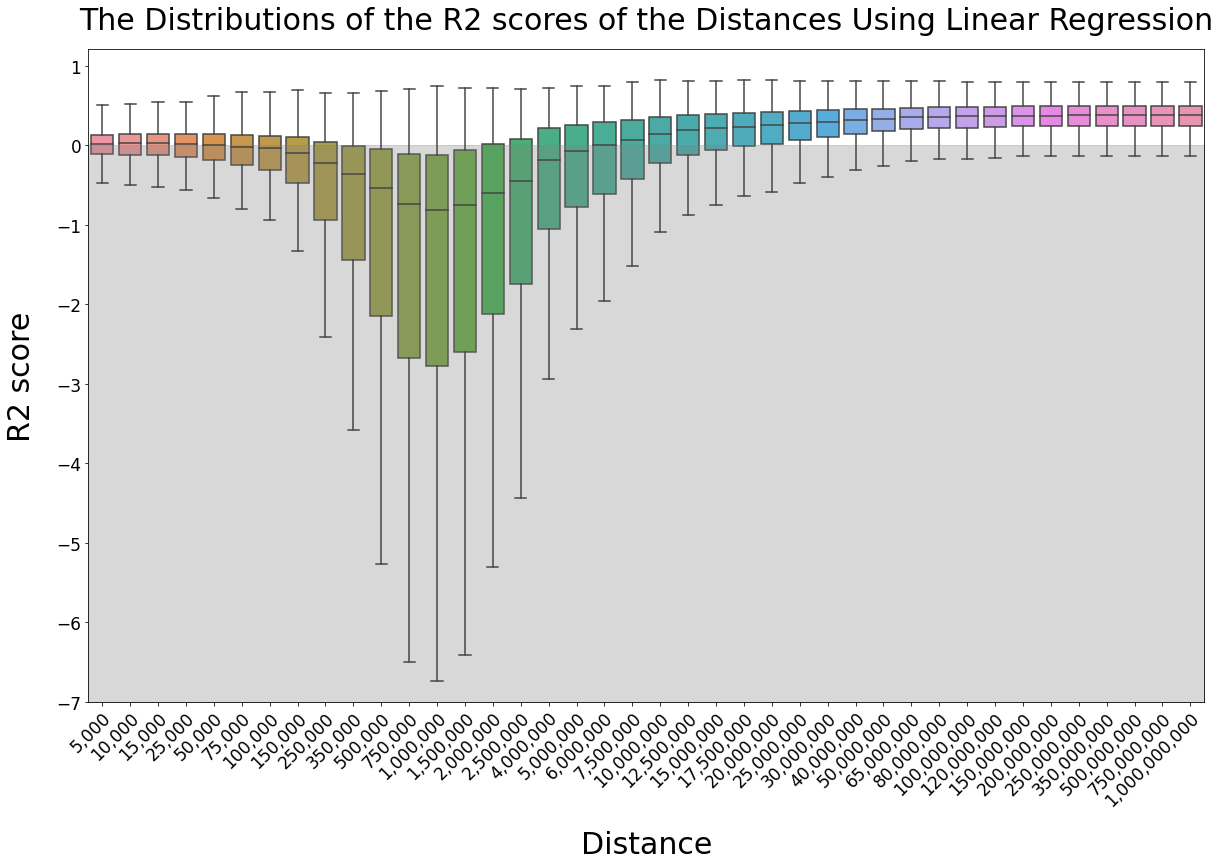

In [14]:
plt.figure(figsize=(20, 12))

# Creating a boxplot for every column (sample) in the 'R2_scores_all_distances' DataFrame, plotting them on the same axis, 
# without showing the outliers.
ax = sns.boxplot(data=R2_scores_all_distances, showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor', fontsize=17)
ax.tick_params(axis='y', labelsize=17)

# Adding the legend, a title and the labels to the plot.
ax.set_title('The Distributions of the R2 scores of the Distances Using Linear Regression', pad=20, fontsize=30)
ax.set_xlabel('Distance', labelpad=20, fontsize=30)
ax.set_ylabel('R2 score', labelpad=20, fontsize=30)

# Setting the area featuring negative R2 scores to be gray to more clearly display where the distributions are exactly 
# located.
ax.set_ylim(bottom=-7)
y_min = ax.get_ylim()[0]
ax.fill_between([-0.5, len(R2_scores_all_distances.columns) - 0.5], y_min, 0, color='gray', alpha=0.3)

# Saving the plot by calling the function 'savefig()'.
file_to_save = data_directory_results_distance + f"/R2_scores_all_distances_linear_regression.png"
plt.savefig(file_to_save, bbox_inches='tight')

# Show the plot
plt.show()

In addition, we can also display the median R<sup>2</sup> score for every distance. This can be achieved by calling the function 'median()'.

In [15]:
# Calculating the median of each of the distances of the 'R2_scores_all_distances' DataFrame by calling the function 
# 'median()'.
distance_medians = R2_scores_all_distances.median(numeric_only=True)

print("The median R2 score for every distributions of the 40 distances:")
distance_medians

The median R2 score for every distributions of the 40 distances:


5,000            0.023057
10,000           0.023250
15,000           0.024516
25,000           0.016794
50,000          -0.000364
75,000          -0.020187
100,000         -0.039635
150,000         -0.097584
250,000         -0.222105
350,000         -0.362929
500,000         -0.541674
750,000         -0.739267
1,000,000       -0.814743
1,500,000       -0.751749
2,000,000       -0.596215
2,500,000       -0.447830
4,000,000       -0.181805
5,000,000       -0.073727
6,000,000       -0.000879
7,500,000        0.071915
10,000,000       0.144381
12,500,000       0.192462
15,000,000       0.219649
17,500,000       0.236860
20,000,000       0.256270
25,000,000       0.281238
30,000,000       0.299106
40,000,000       0.323722
50,000,000       0.335980
65,000,000       0.350333
80,000,000       0.357013
100,000,000      0.364335
120,000,000      0.368974
150,000,000      0.372895
200,000,000      0.375139
250,000,000      0.376008
350,000,000      0.376008
500,000,000      0.376008
750,000,000 

As we can see from the box plots above, there is quite some fluctuation between the distributions of R<sup>2</sup> scores for the different distances. One thing we can notice though is that the distances starting from 5,000 seem to perform worse as the distance starts to increase with the lowest median R<sup>2</sup> score being for a distance of 1,000,000. After this distance, however, the median R<sup>2</sup> scores increases as the distance increases even reaching a median R<sup>2</sup> score that is higher than the one for a distance of 5,000. Therefore, we can already make the conclusion that while using linear regression the larger distances (starting from around 7,500,000 onwards) perform better. A possible reason as to why there is not a steady increase from the smallest to the largest distances but there is instead a valley that interrupts this increasing could be that for these distances present within the valley there are quite a lot of CpG sites that have a negative influence on the prediction accuracy. The coefficients of these CpG sites are pushed towards zero by linear regression but are not completely set equal to zero as for example lasso regression does causing them still to have a (negative) effect on the prediction of the gene expression value.

The increase in median R<sup>2</sup> score from a distance of 7,500,000 continues up until a distance of 250,000,000 where for even larger distances there does not seem to be any difference between the distributions. This can also be seen in the median R<sup>2</sup> scores being displayed before where the last 5 distances experimented with all have the same median R<sup>2</sup> score: 0.376008. This makes sense and is expected since as we can see from the 'chromosomes_length_data' DataFrame the chromosome with the largest length (chromosome 1) has a length of 249,250,621. This means since we only consider CpG sites for predicting a gene expression value that are located on the same chromosome as the gene, there are no additional CpG sites consider when increasing the distance from 250,000,000 to any other value. Therefore, we can also exclude these distances greater than 250,000,000 from the plot.

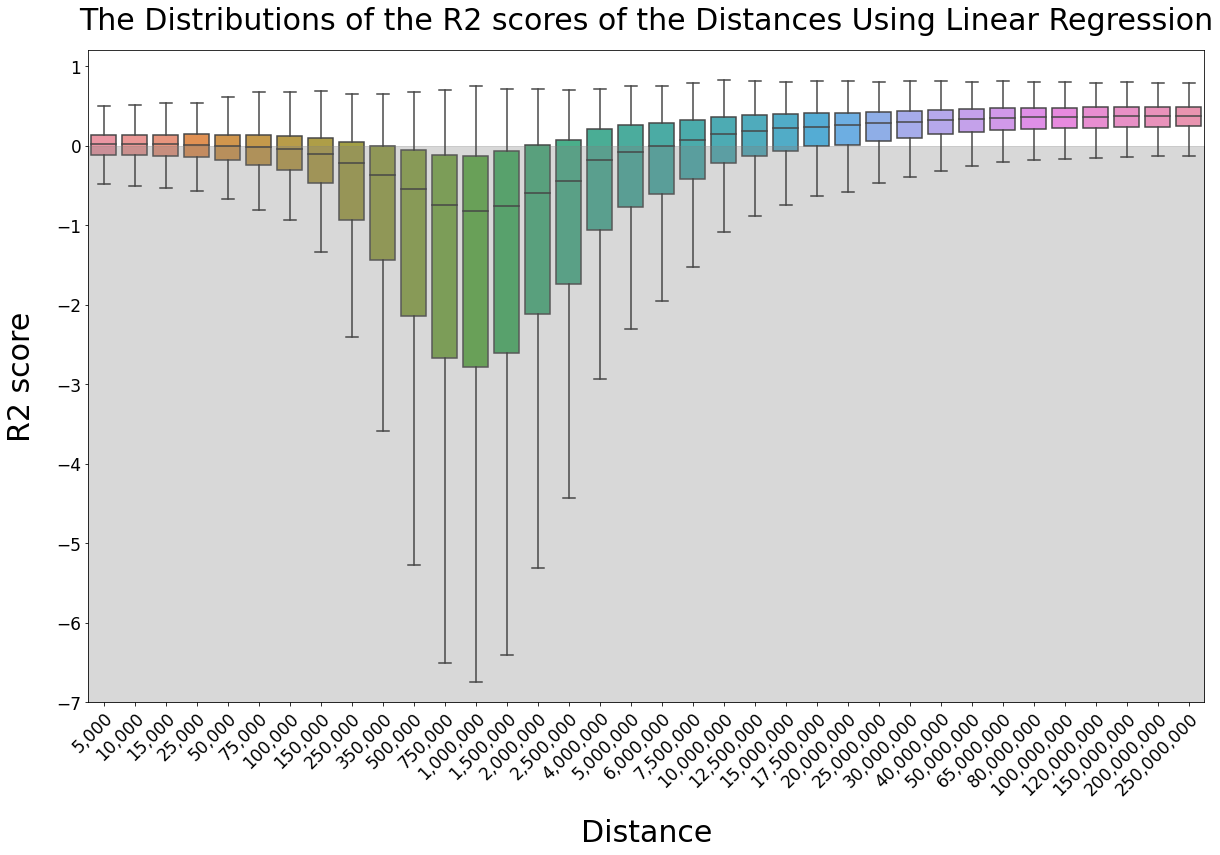

In [16]:
plt.figure(figsize=(20, 12))

# Creating a boxplot for every column (sample) in the 'R2_scores_all_distances' DataFrame, plotting them on the same axis, 
# without showing the outliers.
ax = sns.boxplot(data=R2_scores_all_distances.iloc[:, :36], showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor', fontsize=17)
ax.tick_params(axis='y', labelsize=17)

# Adding the legend, a title and the labels to the plot.
ax.set_title('The Distributions of the R2 scores of the Distances Using Linear Regression', pad=20, fontsize=30)
ax.set_xlabel('Distance', labelpad=20, fontsize=30)
ax.set_ylabel('R2 score', labelpad=20, fontsize=30)

# Setting the area featuring negative R2 scores to be gray to more clearly display where the distributions are exactly 
# located.
ax.set_ylim(bottom=-7)
y_min = ax.get_ylim()[0]
ax.fill_between([-0.5, len(R2_scores_all_distances.columns[:36]) - 0.5], y_min, 0, color='gray', alpha=0.3)

# Saving the plot by calling the function 'savefig()'.
file_to_save = data_directory_results_distance + f"/R2_scores_distances_until_250000000_linear_regression.png"
plt.savefig(file_to_save, bbox_inches='tight')

# Show the plot
plt.show()

To increase the quality of the visualization to come to a conclusion as to when the median R<sup>2</sup> scores do not seem to increase anymore indicating that the distance right before it stops increasing actually performs the best we can focus a bit more on these by exclusively displaying these in the next plot.

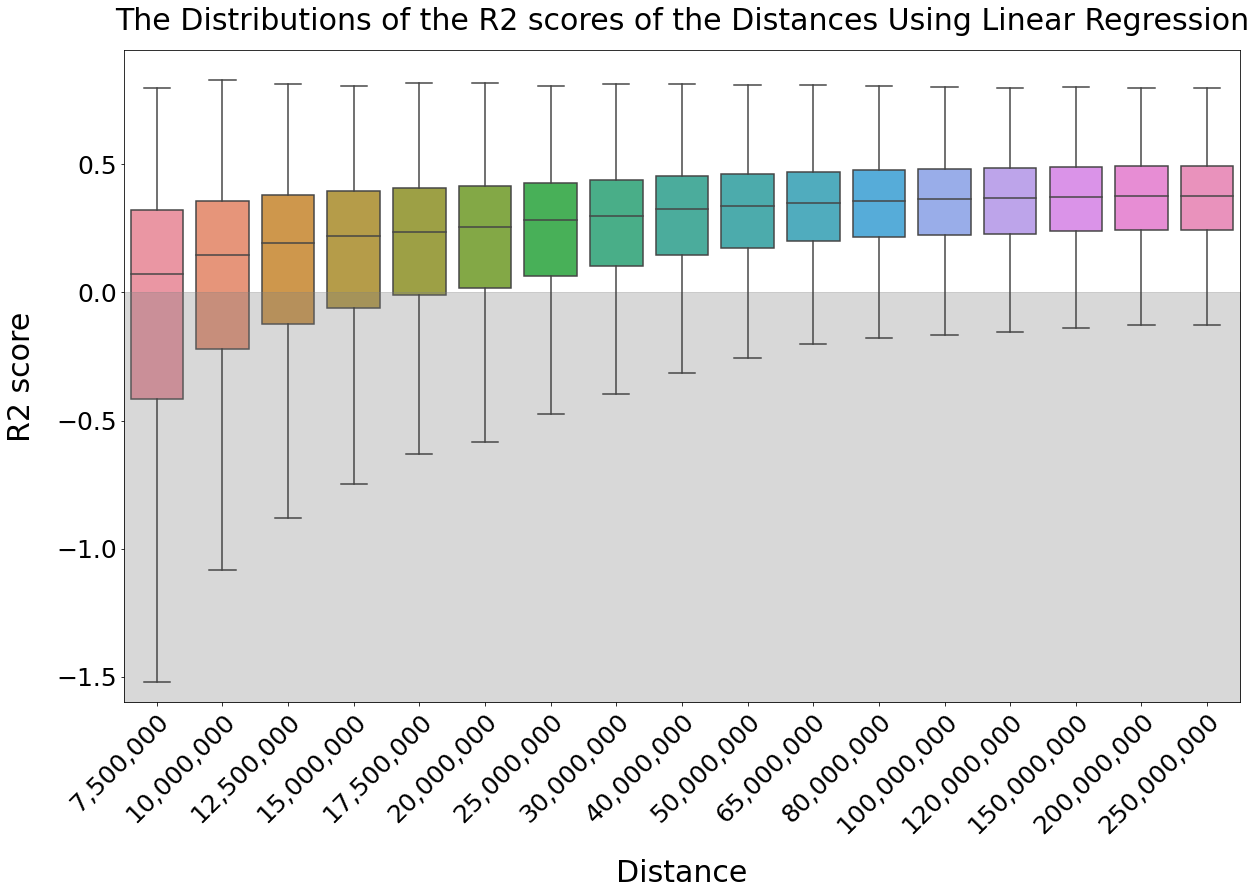

In [17]:
plt.figure(figsize=(20, 12))

# Creating a boxplot for every column (sample) in the 'R2_scores_all_distances' DataFrame, plotting them on the same axis, 
# without showing the outliers.
ax = sns.boxplot(data=R2_scores_all_distances.iloc[:, 19:36], showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor', fontsize=25)
ax.tick_params(axis='y', labelsize=25)

# Adding the legend, a title and the labels to the plot.
ax.set_title('The Distributions of the R2 scores of the Distances Using Linear Regression', pad=20, fontsize=30)
ax.set_xlabel('Distance', labelpad=20, fontsize=30)
ax.set_ylabel('R2 score', labelpad=20, fontsize=30)

# Setting the area featuring negative R2 scores to be gray to more clearly display where the distributions are exactly 
# located.
ax.set_ylim(bottom=-1.6)
y_min = ax.get_ylim()[0]
ax.fill_between([-0.5, len(R2_scores_all_distances.columns[19:36]) - 0.5], y_min, 0, color='gray', alpha=0.3)

# Saving the plot by calling the function 'savefig()'.
file_to_save = data_directory_results_distance + f"/R2_scores_distances_from_7500000_linear_regression.png"
plt.savefig(file_to_save, bbox_inches='tight')

# Show the plot
plt.show()

As we can see from the box plots above, from a distance of 7,500,000 onwards there is still (although slight) an increase in the median R<sup>2</sup> score when the distance is increased. We can conclude that a distance of 250,000,000 results in the highest prediction accuracy which can also be verified in the code below. It is important to note, however, that the differences in terms of median R<sup>2</sup> score with any of the surrounding distances is not that large.

In [18]:
# Retrieving the maximum median R2 score in the 'distance_medians' list by calling the function 'max()'.
max_median = max(distance_medians[:36])

# Retrieving the distances which have the highest median present in the 'distances_medians' list.
distance_with_highest_median = distance_medians[:36][distance_medians == max_median].index.tolist()

print("Distance with the highest median: ", distance_with_highest_median)

Distance with the highest median:  ['250,000,000']
